In [1]:
import numpy as np
import scipy as sp
import math
import matplotlib.pyplot as plt
from math import sqrt
from scipy.optimize import leastsq
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
#cd /content/drive/MyDrive/islab

/content/drive/MyDrive/islab


In [4]:
#7.24
def real_func(x):
    return np.sin(2*np.pi*x)

def fit_func(p, x):
    f = np.poly1d(p)
    return f(x)

def residuals_func_regularization(p, x, y):
    ret = fit_func(p, x) - y
    ret = np.append(ret, np.sqrt(0.5*regularization*np.square(p))) 
    return ret

def fitting(M=0):
    p_init = np.random.rand(M+1)
    p_lsq_regularization = leastsq(residuals_func_regularization, p_init, args=(x_train, y_train))
    
    return p_lsq_regularization

In [5]:
x = np.loadtxt("data20.csv",delimiter=" ",usecols=(0))
y = np.loadtxt("data20.csv",delimiter=" ",usecols=(1))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)

regularization = 0.0001

p_lsq_regularization = fitting(M=9)

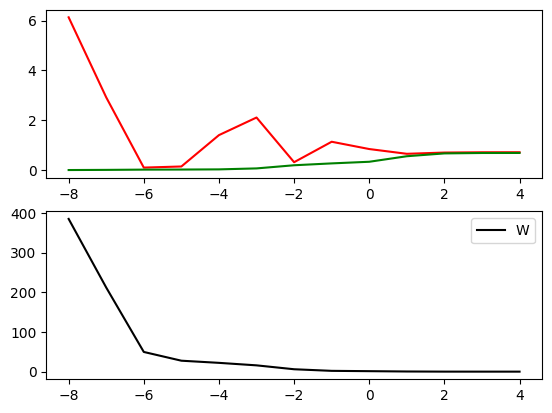

In [6]:
#7.25
Reg = [-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4]
RMSE_test = []
RMSE_train = []
W = []
for reg in Reg :
    regularization = pow(10, reg)
    p_lsq_regularization = fitting(M=9)
    y_train_pred = fit_func(p_lsq_regularization[0], x_train)
    RMSE_train.append(sqrt(mean_squared_error(y_train, y_train_pred)))    
    y_test_pred = fit_func(p_lsq_regularization[0], x_test)
    RMSE_test.append(sqrt(mean_squared_error(y_test, y_test_pred)))
    W.append(sqrt(np.sum(p_lsq_regularization[0]**2))) 
    

ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2)  
plt.sca(ax1)
plt.plot(Reg, RMSE_test,color='red')
plt.plot(Reg, RMSE_train, color='green')
plt.sca(ax2)
plt.plot(Reg, W, color='black',label='W')
plt.legend()

In [7]:
RMSE_test = [1,2,3]
#a = np.sum(RMSE_test ** 2)
#print (a)
print (type(RMSE_test))

<class 'list'>


[1.8412895157037485, 1.6033727026386082, 1.427502388527799, 1.2153417882156172, 1.0239133583567601, 0.9838015890641025, 0.9111459848303105, 0.8640117599097262, 0.8375402607414588, 0.8191442759432134, 0.8083773930816776, 0.8000684223190893, 0.793091222783358]


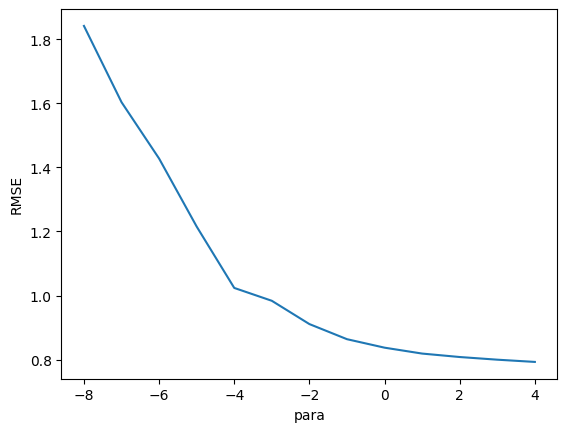

In [8]:
#7.26
rms = []
RMSE_test = []
kf = KFold(n_splits=5)
Reg = [-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4]


for reg in Reg :
    regularization = pow(10, reg)
    for train_index, test_index in kf.split(x,y):
      x_train, x_test = x[train_index], x[test_index]
      y_train, y_test = y[train_index], y[test_index]
      p_lsq_regularization = fitting(M=9)   
      y_test_pred = fit_func(p_lsq_regularization[0], x_test)
      rms.append(sqrt(mean_squared_error(y_test, y_test_pred)))
    poly_rmse = np.mean(rms)
    RMSE_test.append(poly_rmse)  
print (RMSE_test)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(Reg, RMSE_test)
ax.set_xlabel('para')
ax.set_ylabel('RMSE')
plt.show()

reg = -8, RMSE = 1.84
reg = -7, RMSE = 1.60
reg = -6, RMSE = 1.43
reg = -5, RMSE = 1.22
reg = -4, RMSE = 1.02
reg = -3, RMSE = 0.98
reg = -2, RMSE = 0.91
reg = -1, RMSE = 0.86
reg = 0, RMSE = 0.84
reg = 1, RMSE = 0.82
reg = 2, RMSE = 0.81
reg = 3, RMSE = 0.80
reg = 4, RMSE = 0.79
[1.8412530001057104, 1.603239309943455, 1.4274180860141001, 1.2152786999527323, 1.0238631049251976, 0.9837597108607824, 0.9111100759952233, 0.8639803074300716, 0.8375123053273089, 0.819119114017631, 0.8083545185512128, 0.8000474540776014, 0.7930718675086409]


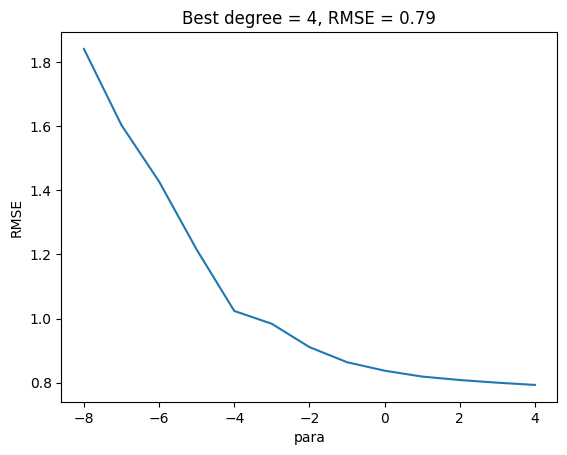

In [9]:
#7.27
rms = []
RMSE_test = []
kf = KFold(n_splits=5)
Reg = [-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4]
min_rmse, min_reg= 1e10, 0

for reg in Reg :
    regularization = pow(10, reg)
    for train_index, test_index in kf.split(x,y):
      x_train, x_test = x[train_index], x[test_index]
      y_train, y_test = y[train_index], y[test_index]
      p_lsq_regularization = fitting(M=9)   
      y_test_pred = fit_func(p_lsq_regularization[0], x_test)
      rms.append(sqrt(mean_squared_error(y_test, y_test_pred)))
    poly_rmse = np.mean(rms)
    RMSE_test.append(poly_rmse) 
    
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_deg = reg
    print('reg = %s, RMSE = %.2f' % (reg, poly_rmse))
print (RMSE_test)


fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(Reg, RMSE_test)
ax.set_xlabel('para')
ax.set_ylabel('RMSE')
ax.set_title('Best degree = %s, RMSE = %.2f' %(min_deg, min_rmse))   
plt.show()

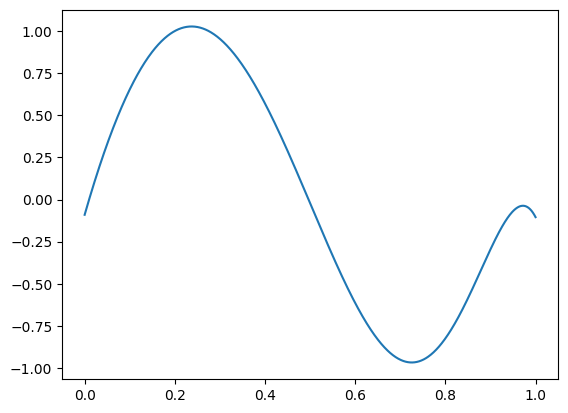

In [10]:
#7.28
x_train = np.loadtxt("data20.csv",delimiter=" ",usecols=(0))
y_train = np.loadtxt("data20.csv",delimiter=" ",usecols=(1))


regularization = pow(10, -4)
p_lsq_regularization = fitting(M=9)
x_points = np.linspace(0, 1, 1000)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(x_points, fit_func(p_lsq_regularization[0], x_points), label='regularization')  
plt.show()